<a href="https://colab.research.google.com/github/aliarman1/DataWarehouse/blob/main/ID_56_and_45_DataMiningProjectV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings


In [ ]:
df = pd.read_csv('ID_56_and_45_Datamining_Dataset.csv')
df.head()

,content,class,Unnamed: 2
0,"In this study, aim to generate DTM that...",0,0 = Original \n1 = AI
1,"In this study, our objective is to create a Di...",1,NaN
2,"In this study, our objective is to create a Di...",1,NaN
3,Kaguya is a large satellite was launched from ...,0,NaN
4,"Kaguya, a substantial satellite launched from ...",1,NaN


In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     770 non-null    object
 1   class       770 non-null    int64 
 2   Unnamed: 2  1 non-null      object
dtypes: int64(1), object(2)
memory usage: 18.2+ KB


## Preprocessing the dataset

In [ ]:
df.head()

,content,class,Unnamed: 2
0,"In this study, aim to generate DTM that...",0,0 = Original \n1 = AI
1,"In this study, our objective is to create a Di...",1,NaN
2,"In this study, our objective is to create a Di...",1,NaN
3,Kaguya is a large satellite was launched from ...,0,NaN
4,"Kaguya, a substantial satellite launched from ...",1,NaN


In [ ]:
# cleaning content
df['clean_content'] = df['content'].str.replace("[^a-zA-Z0-9#]", " ")
df.head()

<ipython-input-93-7f998713582a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_content'] = df['content'].str.replace("[^a-zA-Z0-9#]", " ")


,content,class,Unnamed: 2,clean_content
0,"In this study, aim to generate DTM that...",0,0 = Original \n1 = AI,In this study aim to generate DTM that...
1,"In this study, our objective is to create a Di...",1,NaN,In this study our objective is to create a Di...
2,"In this study, our objective is to create a Di...",1,NaN,In this study our objective is to create a Di...
3,Kaguya is a large satellite was launched from ...,0,NaN,Kaguya is a large satellite was launched from ...
4,"Kaguya, a substantial satellite launched from ...",1,NaN,Kaguya a substantial satellite launched from ...


In [ ]:
# remove short words
df['clean_content'] = df['clean_content'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,content,class,Unnamed: 2,clean_content
0,"In this study, aim to generate DTM that...",0,0 = Original \n1 = AI,this study generate that express detail terrai...
1,"In this study, our objective is to create a Di...",1,NaN,this study objective create Digital Terrain Mo...
2,"In this study, our objective is to create a Di...",1,NaN,this study objective create Digital Terrain Mo...
3,Kaguya is a large satellite was launched from ...,0,NaN,Kaguya large satellite launched from Japan 200...
4,"Kaguya, a substantial satellite launched from ...",1,NaN,Kaguya substantial satellite launched from Jap...


In [ ]:
# # feature extraction
from sklearn.feature_extraction.text import CountVectorizer
# txt_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# txt = txt_vectorizer.fit_transform(df['clean_content'])


vectorizer = CountVectorizer()
txt = vectorizer.fit_transform(df['clean_content'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(txt, df['class'], random_state=42, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# Logistic Regresion model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# testing
pred = model.predict(x_test)
# f1_score(y_test, pred)
accuracy_score(y_test,pred)
LR_Accuracy = accuracy_score(y_test,pred)
LR_Accuracy

0.8756476683937824

In [ ]:
# pred_prob = model.predict_proba(x_test)
# pred = pred_prob[:, 1] >= 0.3
# pred = pred.astype(np.int)

# f1_score(y_test, pred)

In [ ]:
#SVM Model

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
y_Pred = classifier.predict(x_test)
# testing
pred = classifier.predict(x_test)
SVM_Acuuracy = accuracy_score(y_test,pred)
SVM_Acuuracy

0.8808290155440415

In [ ]:
# Naive Bayes Model

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = MultinomialNB()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

NaiveBayes_Accuracy = accuracy_score(y_test, y_pred)
NaiveBayes_Accuracy

0.844559585492228

In [ ]:
# Decision Tree Model

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
DecisionTree_accuracy = accuracy_score(y_test, y_pred)
DecisionTree_accuracy



0.7823834196891192

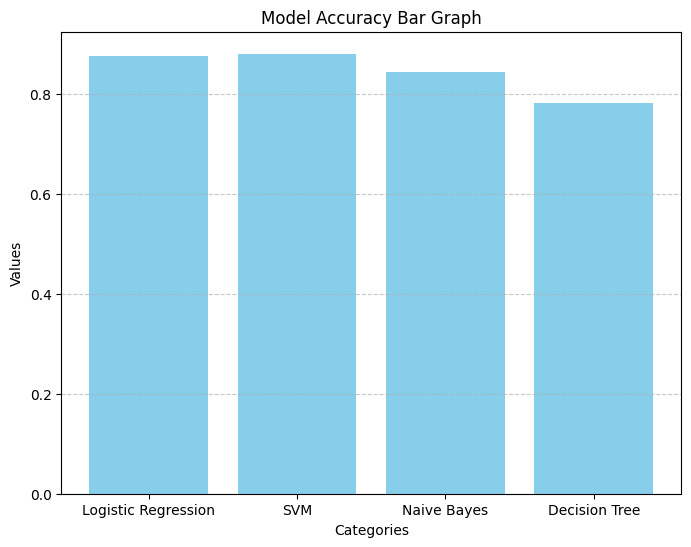

In [ ]:
# Analysis
import matplotlib.pyplot as plt

categories = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree']
values = [LR_Accuracy, SVM_Acuuracy, NaiveBayes_Accuracy, DecisionTree_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='skyblue')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Model Accuracy Bar Graph')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()